## 1) Setup & Load

In [1]:
import os, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV_PATH = "final_internship_data.csv" 
SEED = 42
pd.set_option("display.max_columns", 100)
rng = np.random.default_rng(SEED)

# Load data
df = pd.read_csv(CSV_PATH)
n_rows, n_cols = df.shape
mem_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"Rows: {n_rows:,} | Cols: {n_cols} | Memory ~ {mem_mb:.2f} MB")

# Try to parse datetime-like object columns (90%+ parseable)
date_cols = []
for c in df.select_dtypes(include=["object"]).columns:
    try:
        parsed = pd.to_datetime(df[c], errors="raise", infer_datetime_format=True)
        if parsed.notna().mean() > 0.9:
            df[c] = parsed
            date_cols.append(c)
    except Exception:
        pass

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
dt_cols = df.select_dtypes(include=["datetime64[ns]", "datetime64[ns, UTC]"]).columns.tolist()
date_cols = list(set(date_cols + dt_cols))

print("Numeric:", len(num_cols), "| Categorical:", len(cat_cols), "| Datetime:", len(date_cols))
df.head(10)


Rows: 500,000 | Cols: 26 | Memory ~ 337.07 MB


C:\Users\Firas\AppData\Local\Temp\ipykernel_15468\470447128.py:21: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(df[c], errors="raise", infer_datetime_format=True)
C:\Users\Firas\AppData\Local\Temp\ipykernel_15468\470447128.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(df[c], errors="raise", infer_datetime_format=True)
C:\Users\Firas\AppData\Local\Temp\ipykernel_15468\470447128.py:21: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consisten

Numeric: 18 | Categorical: 6 | Datetime: 2


,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
5,mMC7oPiW,Kayla Martin,Wendy Bennett,Excellent,sunny,Congested Traffic,2011-01-06 09:50:45.000000200,12.1,2011-01-06 09:50:45,-1.291560,0.710901,-1.291071,0.711365,1,9,6,1,3,2011,42.335622,32.824930,20.648176,15.741133,7.649541,3.787239,-0.674251
6,A2SNLxxM,James Burch,Casey Cannon,Excellent,windy,Flow Traffic,2012-11-20 20:35:00.000000100,7.5,2012-11-20 20:35:00,-1.291195,0.711251,-1.291086,0.711481,1,20,20,11,1,2012,42.563234,35.482608,18.113693,19.126670,10.993150,1.555807,-0.342260
7,tT6AJSJx,Alexander Ingram,Christy Hensley,Good,sunny,Congested Traffic,2012-01-04 17:22:00.000000810,16.5,2012-01-04 17:22:00,-1.290694,0.711643,-1.291371,0.711240,1,17,4,1,2,2012,42.533214,36.829343,16.949505,20.548489,12.449213,4.155444,2.236596
8,D0Yb52vL,Anita Porter,Ana Norton,Excellent,rainy,Dense Traffic,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-1.291656,0.710815,-1.291423,0.710901,1,13,3,12,0,2012,42.240568,29.608237,23.942272,11.667601,3.637447,1.253232,-1.119470
9,GorULe8F,Monica Smith,Daniel Vargas,Very Good,sunny,Dense Traffic,2009-09-02 01:11:00.000000830,8.9,2009-09-02 01:11:00,-1.291206,0.710940,-1.291396,0.711364,2,1,2,9,2,2009,42.218767,33.106804,20.538553,16.193381,8.129651,2.849627,0.327463


## 2) Missing Values & Duplicates

,missing_count,missing_pct
bearing,5,0.0
distance,5,0.0
nyc_dist,5,0.0
sol_dist,5,0.0
lga_dist,5,0.0
ewr_dist,5,0.0
jfk_dist,5,0.0
dropoff_longitude,5,0.0
dropoff_latitude,5,0.0


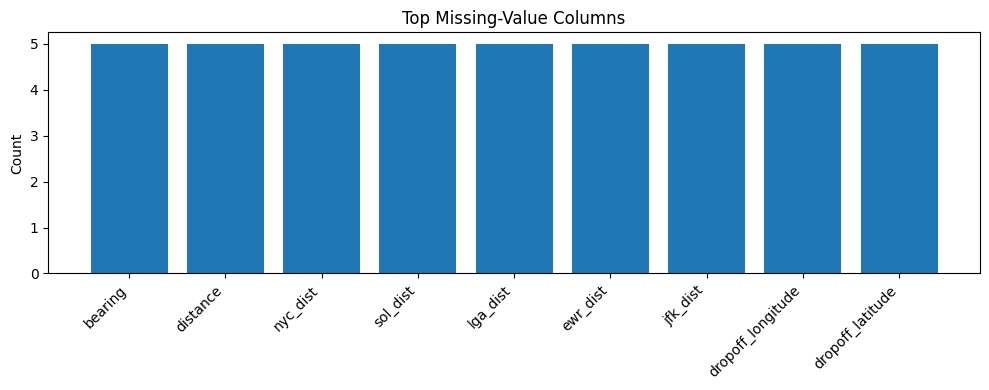

Duplicate rows: 0


In [2]:
# Missing table
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
miss_tbl = pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct})
display(miss_tbl[miss_tbl["missing_count"] > 0].head(30))

# Plot top-15 missing as bars
top_miss = miss_tbl[miss_tbl["missing_count"] > 0].head(15)
if not top_miss.empty:
    plt.figure(figsize=(10,4))
    plt.bar(top_miss.index.astype(str), top_miss["missing_count"])
    plt.title("Top Missing-Value Columns")
    plt.ylabel("Count"); plt.xticks(rotation=45, ha="right")
    plt.tight_layout(); plt.show()

# Duplicates
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)


## 3) Numeric Features — Descriptives, Histograms, Boxplots, Outliers

,count,mean,std,min,25%,50%,75%,max
fare_amount,500000.0,11.358361,9.916617,-44.900000,6.000000,8.500000,12.500000,500.000000
pickup_longitude,500000.0,-1.265712,0.206941,-52.119764,-1.291405,-1.291226,-1.290970,37.360538
pickup_latitude,500000.0,0.696740,0.140909,-54.389440,0.710958,0.711268,0.711520,29.724576
dropoff_longitude,499995.0,-1.265755,0.205903,-59.049665,-1.291393,-1.291197,-1.290908,0.712985
dropoff_latitude,499995.0,0.696675,0.128997,-44.676047,0.710943,0.711277,0.711538,7.061893
passenger_count,500000.0,1.683428,1.307395,0.000000,1.000000,1.000000,2.000000,6.000000
hour,500000.0,13.510834,6.511571,0.000000,9.000000,14.000000,19.000000,23.000000
day,500000.0,15.684206,8.681066,1.000000,8.000000,16.000000,23.000000,31.000000
month,500000.0,6.268650,3.437815,1.000000,3.000000,6.000000,9.000000,12.000000
weekday,500000.0,3.042008,1.949240,0.000000,1.000000,3.000000,5.000000,6.000000


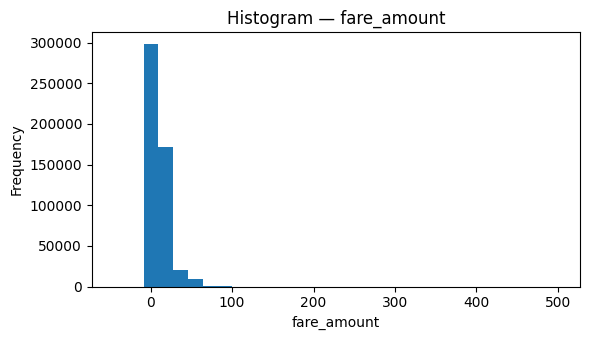

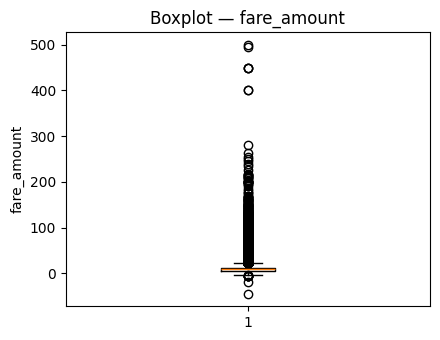

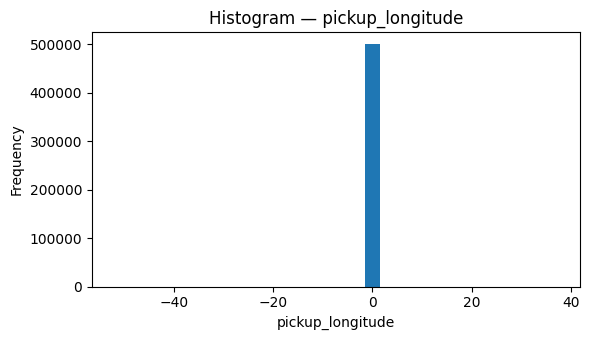

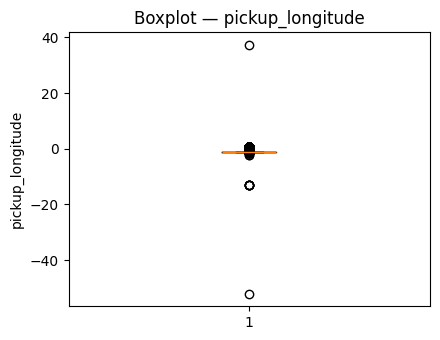

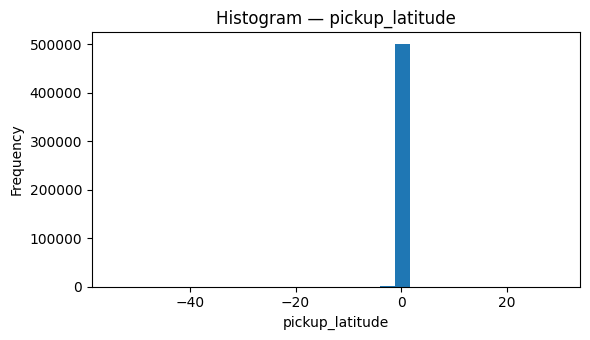

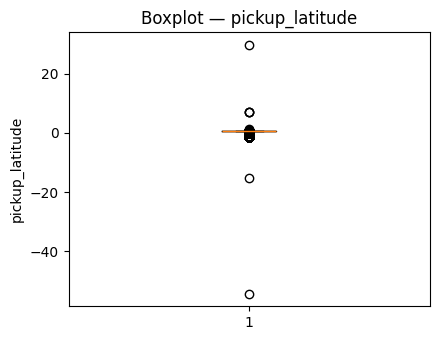

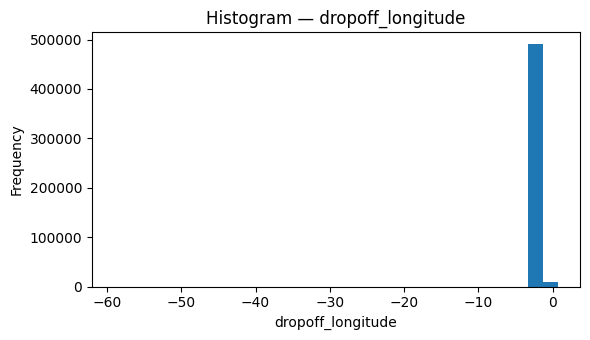

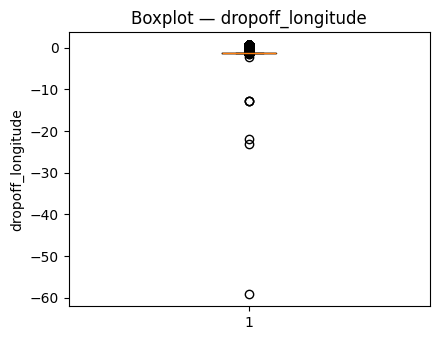

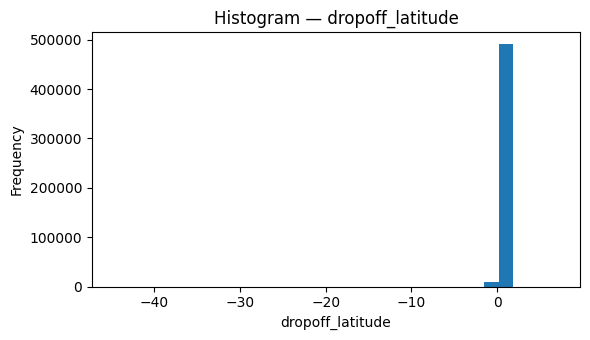

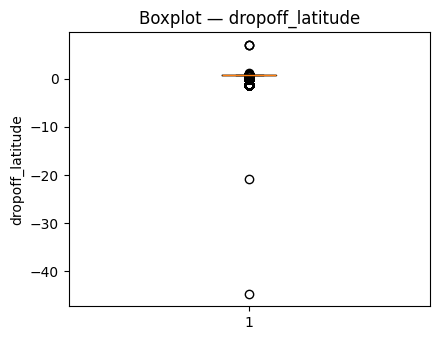

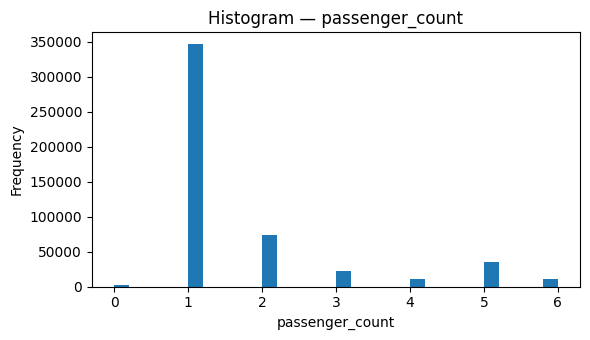

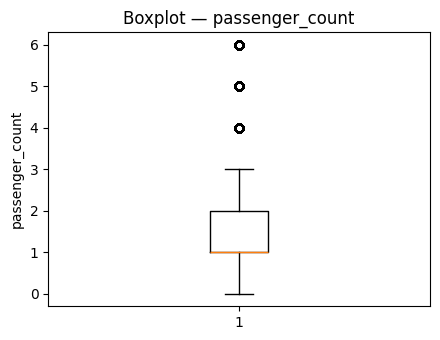

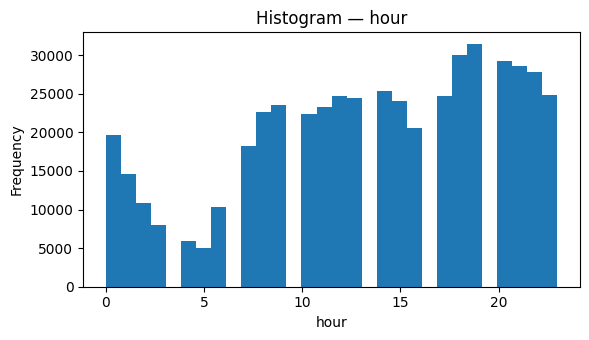

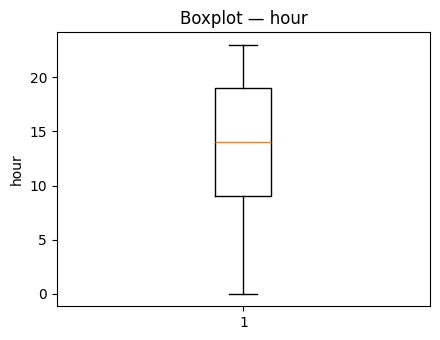

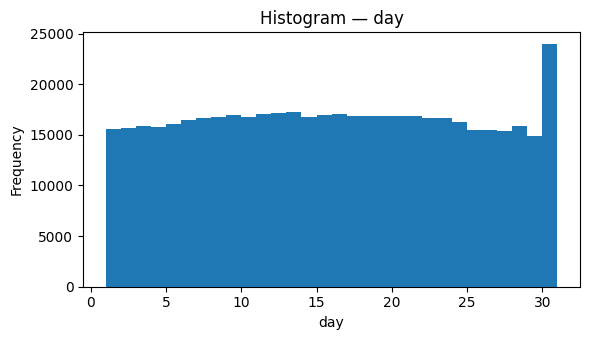

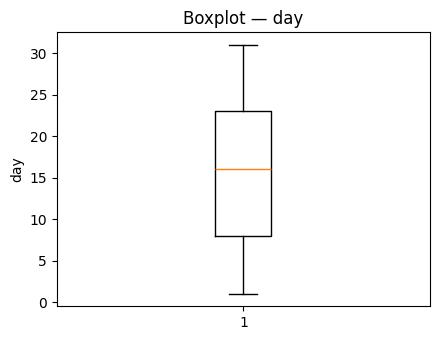

,iqr_outlier_rate
jfk_dist,0.118571
passenger_count,0.113052
fare_amount,0.086662
distance,0.083851
dropoff_longitude,0.071611
pickup_longitude,0.067932
dropoff_latitude,0.061497
ewr_dist,0.056761
pickup_latitude,0.047406
lga_dist,0.045078


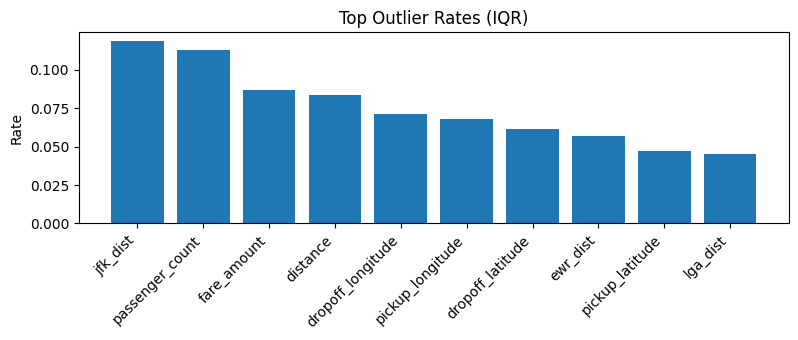

In [3]:
if num_cols:
    # Descriptive stats
    display(df[num_cols].describe().T)

    # Histograms & boxplots for up to 8 numeric columns
    for col in num_cols[:8]:
        s = df[col].dropna()
        if s.nunique() <= 1: 
            continue

        # Histogram
        plt.figure(figsize=(6,3.5))
        plt.hist(s, bins=30)
        plt.title(f"Histogram — {col}")
        plt.xlabel(col); plt.ylabel("Frequency")
        plt.tight_layout(); plt.show()

        # Boxplot
        plt.figure(figsize=(4.5,3.5))
        plt.boxplot(s, vert=True, whis=1.5, showfliers=True)
        plt.title(f"Boxplot — {col}")
        plt.ylabel(col)
        plt.tight_layout(); plt.show()

    # IQR-based outlier rate per column
    def iqr_outlier_rate(x: pd.Series):
        x = x.dropna().values
        if len(x) < 5: 
            return np.nan
        q1, q3 = np.percentile(x, [25, 75])
        iqr = q3 - q1
        if iqr == 0: 
            return 0.0
        lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
        rate = np.mean((x < lo) | (x > hi))
        return float(rate)

    outlier_rates = pd.Series({c: iqr_outlier_rate(df[c]) for c in num_cols})
    outlier_rates = outlier_rates.sort_values(ascending=False)
    display(outlier_rates.to_frame("iqr_outlier_rate").head(15))

    # Plot top-10 highest outlier rate columns
    top_out = outlier_rates.head(10).dropna()
    if not top_out.empty:
        plt.figure(figsize=(8,3.5))
        plt.bar(top_out.index.astype(str), top_out.values)
        plt.title("Top Outlier Rates (IQR)")
        plt.ylabel("Rate"); plt.xticks(rotation=45, ha="right")
        plt.tight_layout(); plt.show()
else:
    print("No numeric columns detected.")


## 4) Categorical Features — Cardinality & Top Frequencies

,unique_values
User ID,500000
Driver Name,221700
User Name,221675
Weather,5
Car Condition,4
Traffic Condition,3


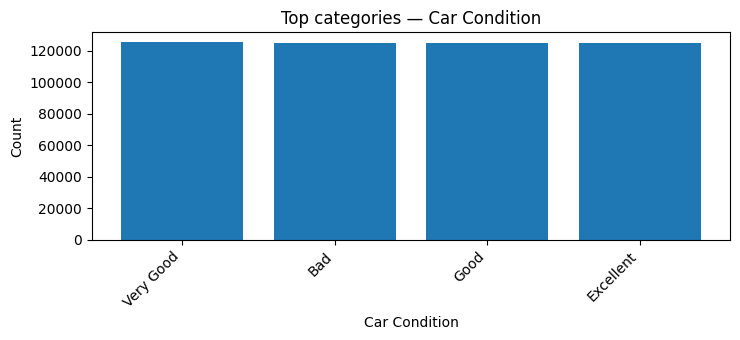

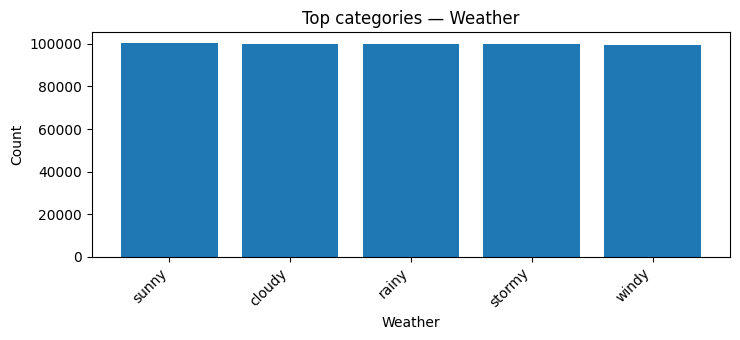

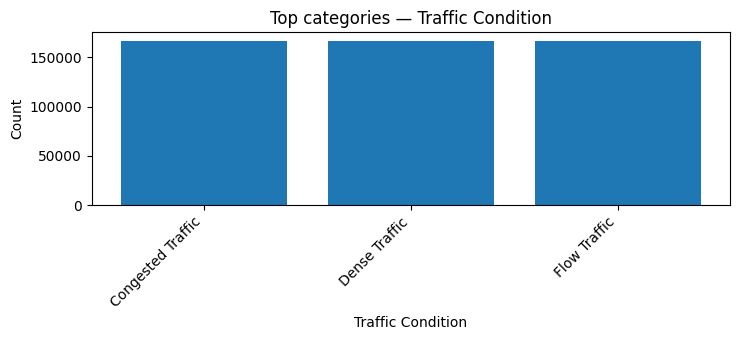

In [4]:
if cat_cols:
    card = pd.Series({c: df[c].nunique(dropna=True) for c in cat_cols}).sort_values(ascending=False)
    display(card.to_frame("unique_values"))

    # Plot top categories for low-cardinality columns (<= 30 unique)
    eligible = [c for c in cat_cols if df[c].nunique(dropna=True) <= 30]
    for col in eligible[:8]:
        vc = df[col].value_counts(dropna=False).head(12)
        plt.figure(figsize=(7.5,3.5))
        plt.bar(vc.index.astype(str), vc.values)
        plt.title(f"Top categories — {col}")
        plt.xlabel(col); plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout(); plt.show()
else:
    print("No categorical columns detected.")


## 5) Correlations — Numeric Heatmap

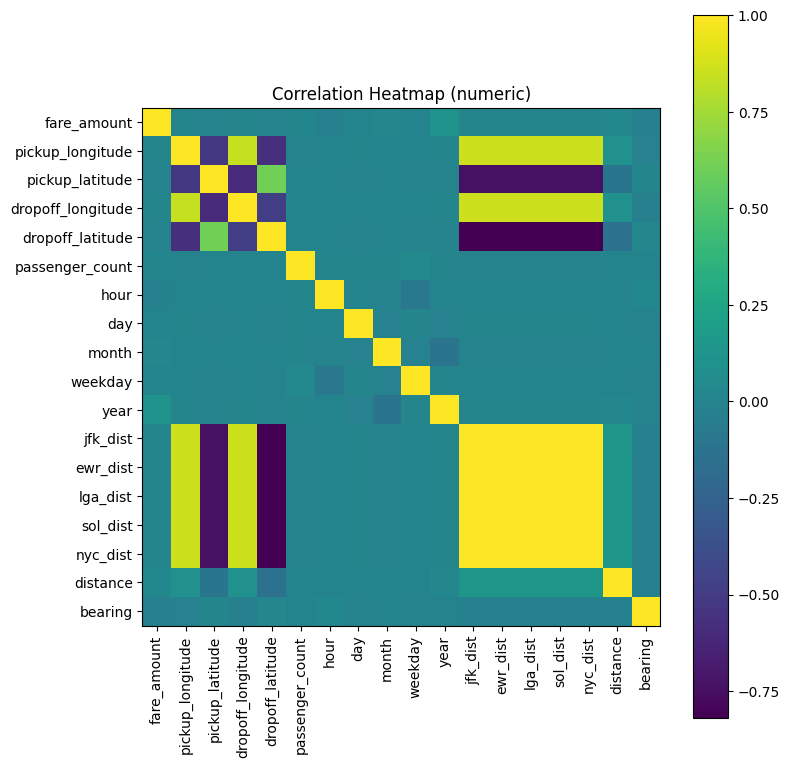

In [5]:
if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(max(6, len(num_cols)*0.45), max(4, len(num_cols)*0.45)))
    plt.imshow(corr, interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title("Correlation Heatmap (numeric)")
    plt.tight_layout(); plt.show()

    # Show top absolute correlations (pairwise)
    pairs = []
    for i in range(len(num_cols)):
        for j in range(i+1, len(num_cols)):
            a, b = num_cols[i], num_cols[j]
            val = corr.loc[a, b]
            if pd.notna(val):
                pairs.append((a, b, float(val), float(abs(val))))
    top_pairs = sorted(pairs, key=lambda x: x[3], reverse=True)[:20]
    pd.DataFrame(top_pairs, columns=["feat_A", "feat_B", "corr", "abs_corr"])
else:
    print("Need at least 2 numeric columns for correlation analysis.")


## 6) Datetime — Daily Counts, Monthly & Weekday Patterns

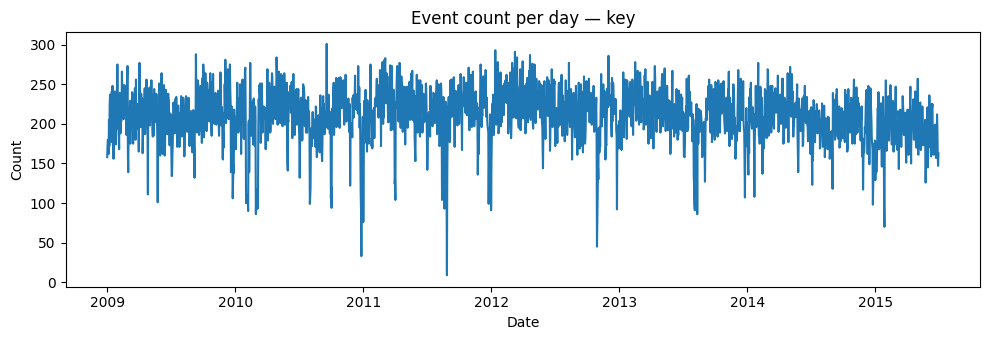

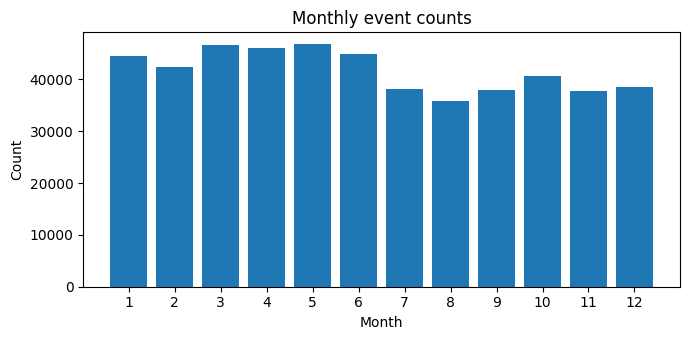

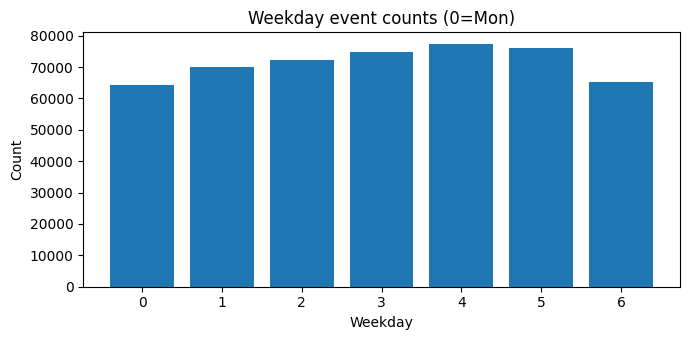

In [6]:
if date_cols:
    date_col = date_cols[0]
    # Daily counts
    counts_by_day = df.set_index(date_col).resample('D').size()
    plt.figure(figsize=(10,3.5))
    plt.plot(counts_by_day.index, counts_by_day.values)
    plt.title(f"Event count per day — {date_col}")
    plt.xlabel("Date"); plt.ylabel("Count")
    plt.tight_layout(); plt.show()

    # Extract month & weekday
    df["_month"] = df[date_col].dt.month
    df["_weekday"] = df[date_col].dt.dayofweek  # 0=Mon

    # Monthly
    m_counts = df["_month"].value_counts().sort_index()
    plt.figure(figsize=(7,3.5))
    plt.bar(m_counts.index.astype(str), m_counts.values)
    plt.title("Monthly event counts")
    plt.xlabel("Month"); plt.ylabel("Count")
    plt.tight_layout(); plt.show()

    # Weekday
    w_counts = df["_weekday"].value_counts().sort_index()
    plt.figure(figsize=(7,3.5))
    plt.bar(w_counts.index.astype(str), w_counts.values)
    plt.title("Weekday event counts (0=Mon)")
    plt.xlabel("Weekday"); plt.ylabel("Count")
    plt.tight_layout(); plt.show()

    # Clean temp features
    df.drop(columns=["_month", "_weekday"], errors="ignore", inplace=True)
else:
    print("No datetime columns detected (or could not auto-parse).")
